# Анализ гипотез для интернет-магазина

Вводные данные: Сотрудники отдела аналитики и отдела маркетинга подготовили список гипотез, которые могут увеличить выручку интернет магазина.

Задача: Приоритизировать гипотезы, запустить A/B-тест и проанализировать полученные результаты. 

Необходимо сделать:

- Применить фреймворки ICE, RICE для приоретизации гипотез
- Проанализировать результаты А/В теста.
- Принять решение относительно полученных результатов.



Перед началом работы импортируем библиотеки, которые нам понадобятся.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
from IPython.display import display
import datetime as dt

## Часть 1. Приоретизация гипотез.

Загразим файл с данными, который содержит информацию о гипотезах

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

Выведем информацию о загруженном датасете и сам датасет

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Данные целостны и корректны, типы данных верны, дубликатов не найдено. Данные готовы к анализу

Опишем все параметры оценки гипотезы:

Reach — скольких пользователей затронет изменение, которое вы хотите внести;

Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;

Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 

Efforts — сколько стоит протестировать эту гипотезу.

Применим фреймворк ICE для оценки приоретизации гипотез:

In [5]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


Далее применим фреймворк RICE для приоретизации гипотез:

In [6]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Рассмотрим описание гипотез и примененный фреймворки более подробно:

In [7]:
pd.set_option('display.max_colwidth', 500)
hypothesis[['Hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.0


Вывод:

Мы можем заметить, что при применениии фреймворка RICE приоритизация гипотез изменилась по сравнению с фреймворком ICE. 
Это произошло по причине того, что во втором случае, при расчетах, мы учитывали параметр Reach, т.е. объем пользователей, которых затронут изменения. Чем большее кол-во пользователей затронет эксперимент, тем более высокая приоритизация у него будет.

## Часть 2. Анализ А/В теста.

Загрузим датасеты с данными о результатах А/В теста:

In [8]:
orders = pd.read_csv('/datasets/orders.csv')

visitors = pd.read_csv('/datasets/visitors.csv')

Выведем информацию об этих датасетах и их первые строки:

In [9]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


В обоих датасетах в стобце date тип данных object. Изменим его на datetime для дальнейшей работы с данными:

In [13]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Отлично! Осталось проверить данные на наличие дубликатов:

In [16]:
orders.duplicated().sum()

0

In [17]:
visitors.duplicated().sum()

0

Все данные проверены, они корректны, дубликаты не выявлены. В процессе предобработки только изменили тип данных в датах. Можем продолжать работу.

Проверим есть ли пропуски в загруженных данных:

In [18]:
visitors.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

In [19]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Далее проверим, есть ли в таблице orders пользователи, которые могли оказать сразу в 2-х группах:

In [20]:
orders.nunique()

transactionId    1197
visitorId        1031
date               31
revenue           713
group               2
dtype: int64

Общее кол-во уникальных пользователей в 2-х группах:

In [21]:
orders.groupby('group').agg({'visitorId' : 'nunique'})

,visitorId
group,
A,503
B,586


Кол-во уникальных пользователей, оказавшихся в обеих группах сразу:

In [22]:
unique_visitors = orders.loc[:, ['visitorId', 'group']].drop_duplicates().drop(columns=['group'])

unique_visitors['visitorId'].duplicated().sum()

58

Все данные проверены, они корректны, дубликаты не выявлены, пропуски не обнаружены.

В процессе предобработки был изменен тип данных в датах на datetime. 

Сравнение уникальных пользователей в таблице orders выявило следующие различия:
- В таблице В на 83 уникальных пользователя больше.
- В группе А и В оказалось 58 одинаковых пользователей одновременно.


### График кумулятивной выручки по группам

Рассчитаем медианную выручку за день в каждой группе, чтобы иметь представление о выручке за день:

In [23]:
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A    112473
B    147274
Name: revenue, dtype: int64

Создадим таблицу cumulativeData, объединяющую данныые по обеим таблицам:

In [24]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим график кумулятивной выручки по группам.

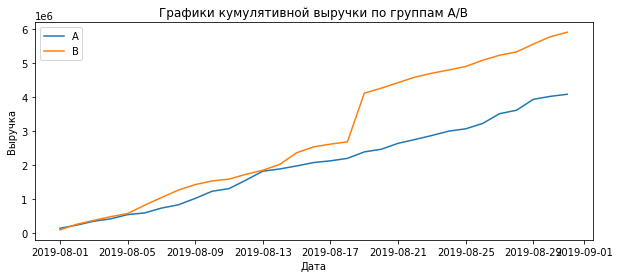

In [25]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(10,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label = 'B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.legend()
plt.show()

Из графика видно, что выручка группы В растет быстрее, чем группы А. Всплеск произошел 19 августа, это могло произойти из-за крупного заказа или большего кол-ва заказов. В остальном, графики показывают похожий рост.

### График кумулятивного среднего чека по группам

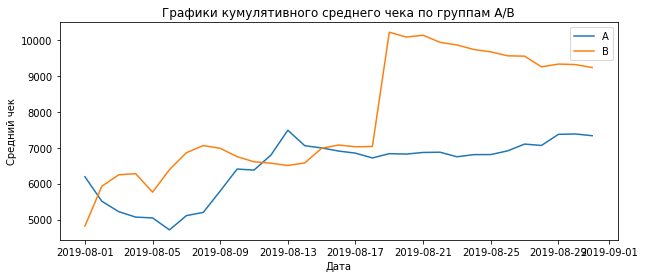

In [26]:
plt.figure(figsize=(10,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue']/cumulativeDataA['orders'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue']/cumulativeDataB['orders'], label = 'B')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

Как мы видим, средний чек в группе В был, практически, все время выше, чем в группе А. Так же на графике видно резкое увеличение ср. чека, как и в случае с графиком кумулятивной выручки. 

Стоит рассмотреть подробнее эту аномалию.

In [27]:
cumulativeDataB.query(' "2019-08-17" <= date <= "2019-08-21" ')

,date,group,orders,buyers,revenue,visitors
33,2019-08-17,B,373,349,2620790,10434
35,2019-08-18,B,382,357,2686621,11171
37,2019-08-19,B,403,377,4116541,11658
39,2019-08-20,B,423,396,4263815,12218
41,2019-08-21,B,437,407,4426892,12874


Кол-во заказов, покупателей и посетителей 19 августа примерно одинаково с остальными днями, во всяком случае аномалий здесь не наблюдается.

Посмотрим на медианное значение стоимости заказа 19 августа:

In [28]:
orders.query(' date == "2019-08-19" ')['revenue'].median()

2630.0

Расмотрим все заказы, сделанные в эту дату:

In [29]:
orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
525,3031564664,393266494,2019-08-19,21550,A
368,3268879337,2536252163,2019-08-19,20026,B
366,2037051350,1957949546,2019-08-19,16770,A
463,4170537404,290022471,2019-08-19,16480,B
531,4016435970,4017075195,2019-08-19,13390,A


Аномалия найдена: заказ 425 в группе В превышает медианное значение заказов в эту дату в 49 раз и равен 1294500. Следовательно этот заказ можем считать выбросом.

### График относительного изменения кумулятивного среднего чека 

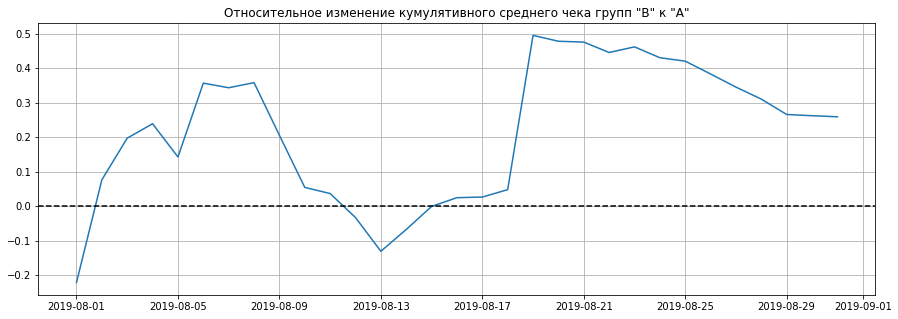

In [30]:
mergedCumulativeRevenue = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
plt.axhline(y=0, color='black', linestyle='--') ;

Выводы будут аналогичны пункту 2.2. Средний чек "B" рос с 1 августа, 2 августа уже превысил "A" и рос до 7 августа. 7-8 пошло обратное движение до 13 августа, причем 3 дня 12-14 августа средний чек "A" был больше "B". С 13 чек "B" опять начал расти и уже 15 числа наступил переломный момент и на следующий день чек "B" оказался больше и находился больше "A" до конца месяца. Так же, в этом графике прослеживается влияние заказа 425 от 19 августа.

### График кумулятивного среднего количества заказов на посетителя по группам

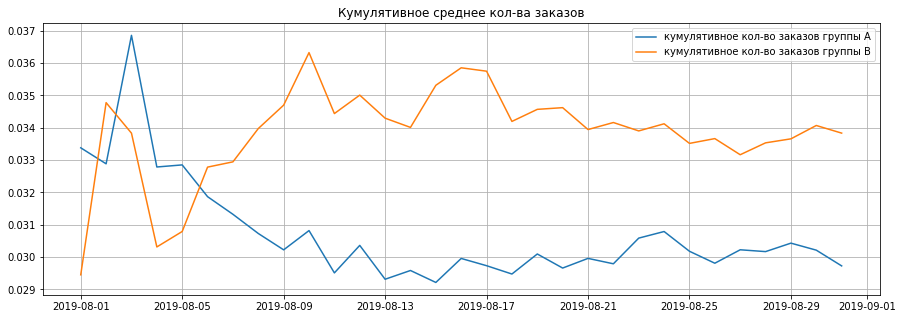

In [31]:
cumulativeData['average_orders'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['average_orders'], label='кумулятивное кол-во заказов группы A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['average_orders'], label='кумулятивное кол-во заказов группы B')
plt.title('Кумулятивное среднее кол-ва заказов')
plt.legend();

По графику мы видим, что среднее кол-во заказов в группе В было выше, чем в группе А практически с самого начала месяца, а именно 6 августа произошел "переломный" момент. Далее среднее число заказов в группе А пошло на спад, а в В наоборот - продолжило расти.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

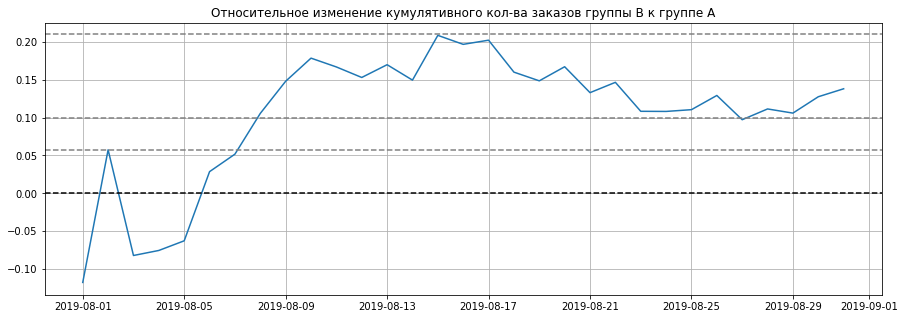

In [32]:
mergedCumulativeOrders = cumulativeDataA[['date','average_orders']].merge(cumulativeDataB[['date','average_orders']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeOrders['date'], mergedCumulativeOrders['average_ordersB']/mergedCumulativeOrders['average_ordersA']-1, label="Относительное изменение кол-ва заказов группы B относительно группы A")

plt.title('Относительное изменение кумулятивного кол-ва заказов группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')
plt.axhline(y=0.057, color='grey', linestyle='--');

Поскольку данный график является производным от графика пункта 2.4, то и выводы тут будут схожими.С начала месяца лидировала группа А, но продолжалось это лишь до 6 числа, далее среднее кол-во заказов было ощутимо больше в группе В.

### Точечный график количества заказов по пользователям. 

Для начала создадим таблицу с пользователями и кол-вом совершенных заказов:

In [33]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head()

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Построим гистограмму:

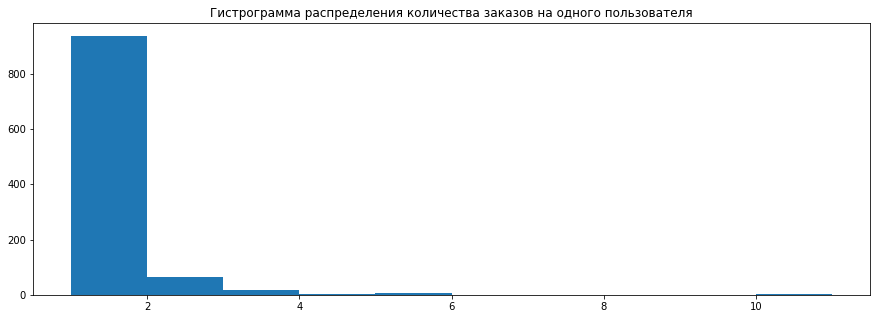

In [34]:
plt.figure(figsize=(15,5))
plt.hist(ordersByUsers['orders'], bins = 10)
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.show()

Из графика видим, что большинство пользователей совершили 1 заказ, тех, кто сделал 2 заказа гораздо меньше. И далее с кол-вом совершенных заказов уменьшается кол-во пользователей.Есть заметная доля клиентов, сделавших 10 заказов и более. Расчитаем перцентили, чтобы понять выбросы это или нет.

### 95-й и 99-й перцентили количества заказов на пользователя. 

Перцентили 95 и 99 по заказам пользователей:

In [35]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Для большей точности и наглдности, можем расчитать все перцентили с 95 по 99:

In [36]:
np.percentile(ordersByUsers['orders'], [95,96,97,98, 99])

array([2., 2., 2., 3., 4.])

Вывод: как и предполагалось, большинство пользователей, то есть порядка 98%, совершают не более 2-х заказов. Все что выше - можно считать аномалией.

### Точечный график стоимостей заказов.

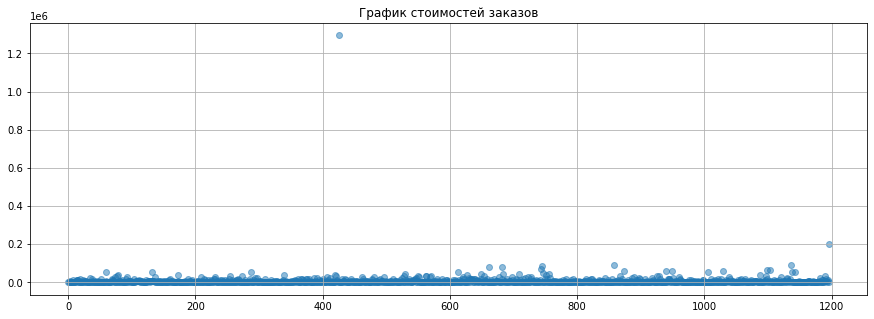

In [37]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5);

На графике хорошо виден тот самы аномальный заказ стоимостью 1,3 млн, так же заметен заказ стоимостью около 200 тыс.
Стоимость остальных заказов находится в границе 100 тыс.
Для больше точности стоит расчитать перцентили стоимости заказов.

###  95-й и 99-й перцентили стоимости заказов.

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Благодаря расчету, мы можем сделать вывод, что только у 5% заказов стоимость превышает 28 тысяч.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Данные по заказам и визитам объединим в одну таблицу. Прежде создадим несколько новых таблиц, а после объединим их.

In [39]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Объединим все в одну таблицу:

In [40]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой (пороговое значение возьмём равное 5%).

p-value округлим до трёх знаков после запятой.

За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет", следовательно альтернативная гипотеза будет следующей: "Статистически значимые различия между группами есть".

In [41]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('alpha =',0.05)
print('p-value = {0:.3f}'.format(st.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


Вывод: 
p-value (который равен 0.017) меньше 0.05. Следовательно, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет можно отвергнуть. Это значит, что по «сырым» данным различия в конверсии групп A и B есть, а относительный прирост конверсии группы B по отношению к группе A равен 13.8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Критерию mannwhitneyu() передадим данные о выручке с заказов (пороговое значение возьмём равное 5%) и найдём относительные различия в среднем чеке между группами.

Нулевую гипотезу определим так: "Статистически значимых различий в средних чеках между группами нет", следовательно альтернативная гипотеза будет следующей: "Статистически значимые различия есть".

In [42]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


P-value значительно больше 0.05. Следовательно, мы принимаем нулевую гипотезу. То есть средние чеки по "сырым" данным схожи. При этом, средний чек группы B значительно выше среднего чека группы A - на 25.9% .

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Мы определили, что подавляющее большинство пользователей не делает более 2 заказов и сумма 1 покупки в большинстве случаев не превышает 28 т.р. Очистим данные от аномальных пользователей с превышающими данные лимиты значениями.

In [43]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Кол-во аномальных пользователей =" ,len(abnormalUsers)) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
Кол-во аномальных пользователей = 74


Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным, чтобы понять как действия аномальных пользователей повлияли на результаты теста.

Применим статистический критерий Манна-Уитни к полученным выборкам.

За нулевую гипотезу примем, что: "Статистически значимых различий в конверсии между группами нет", следовательно альтернативная гипотеза будет следующей: "Статистически значимые различия есть".

In [44]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha = 0.05
p-value = 0.013
Относительный показатель 'B' и 'A' = 0.173


p-value < 0.05, следовательно мы отвергаем нулевую гипотезу об отсутствии статистически значимых различий межд группами.

По "очищеным" данным различия в конверсии групп A и B есть.
Относительный прирост конверсии группы B по отношению к группе A равен 17.3%, что больше 13.8% по "сырым" данным.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Нулевую гипотезу определим так: "Статистически значимых различий в средних чеках между группами нет", следовательно альтернативная гипотеза будет следующей: "Статистически значимые различия есть".

In [45]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

alpha = 0.05
p-value = 0.738
Относительный показатель 'B' и 'A' = -0.020


p-value > 0.05, следовательно мы принимаем нудевую гипотезу и считаем, что значимых различий в средних чеках между группами нет.
Так же стоит отметить, что средний чек группы В оказался незначительно ниже (на 2%) среднего чека в группе А, в то время как по "сырым" данным он был выше на 25.9% .

### Решение по результатам теста.

Выводы:

Первоначально мы приоритезировали гипотезы благодаря фреймворкам ICE и RICE, выяснили, что при увеличении охвата теста гипотезы увеличится и ее приоритезация!

Далее были проведены А/В тесты.

В результате всех проведенных тестов мы пришли к следующим результатам:

- Что по "сырым", что по "очищенным" данным имеются различия в конверсии между группами А и В. По "сырым" данным Конверсия группы В выше на 13.8%, а по "очищенным" на 17.3% .

- И по "сырым" и по "очищенным" данным координальных отличий в средних чеках между группами не наблюдается, даже не смотря на больший показатель группы А (на 2%) по "очищенным" данным.


Результаты тестирования можно интерпретировать следующим образом:

Можно принять решение остановить тестирование и констатировать успех и победу группы B: группа B значительно лучше (эффективнее) группы A по конверсии, хотя по среднему чеку группы примерно равны.